In [1]:
# python libraries
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# magic
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# hacks
import os
import sys
nb_dir = os.path.split(os.path.abspath(os.getcwd()))[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

### Test Files:

In [4]:
# test files
import Dynamics

### Convienent Locations:

In [5]:
cartesian_Earth = np.array([1,0,0]) # [AU]
cartesian_Sun   = np.array([0,0,0]) # [AU]

### Convienent Directions:

In [6]:
cartesian_fromSun = np.array([1,0,0])
cartesian_toSun   = np.array([-1,0,0])
cartesian_right   = np.array([0,1,0])
cartesian_left    = np.array([0,-1,0])
cartesian_up      = np.array([0,0,1])
cartesian_down    = np.array([0,0,-1])

### Convienent Zs:

In [7]:
Z_neutron  = 0
Z_proton   = 1
Z_deuteron = 1
Z_alpha    = 2
Z_helium   = 4
Z_carbon   = 6
Z_nitrogen = 7
Z_oxygen   = 8
Z_neon     = 10
Z_argon    = 18
Z_iron     = 26
Z_krypton  = 36
Z_xenon    = 54
Z_uranium  = 92

# Trajectory

In [19]:
def solveTrajectory(cartesian_pos, cartesian_beta, Z, E, test_field=None):
    """Calcuates the trajectory of nuclei Z with energy E.
    Assumes ultra-relativistic nuclei with beta > 0.999990 ~= 1.
    returns an array of cartesian positions describing the path solved.
    cartesian_pos === [astronomical units]
    cartesian_beta === [meters/second]
    Z === [unitless]
    E === [electronVolts]
    test_field === if None, use solar field, if e.g. np.array([0,0,10]) use test field
    """
    m_per_AU = 149597870700. # use:  number [AU] * m_per_AU = converted number [m]
    #Ro = 0.00465 # radius of Sun [astronomical units]
    Re = 6.3781e6 # radius of Earth [meters]
    ReAU = Re / m_per_AU # radius of Earth [AU]

    initial_l    = 0.
    initial_pos  = np.array(cartesian_pos)  # [astronomical units]
    initial_beta = np.array(cartesian_beta) # [meters/second]
    ratio = Z / float(E)
    print 'ratio = {}'.format(ratio)
    
    # enforce special relativity:
    initial_beta = initial_beta / np.sqrt( np.dot(initial_beta, initial_beta) )
    initial_conditions = np.concatenate(( initial_pos, initial_beta ))
    
    # set_integrator('vode (or lsoda)', method='BDF') is meant for stiff equations
    # they're faster than runge-kutta
    integrator = integrate.ode(Dynamics.applyForces).set_integrator('vode', method='BDF')
    integrator.set_initial_value(initial_conditions, initial_l).set_f_params(ratio, test_field)

    final_l = 200   # track particle for 6 AU
    dl = 1e-6     # numerical stepsize, dl distance (in AU) (1e-6 AU ~ 150 km)
    positions = []
    while (integrator.successful() and integrator.t < final_l):
        integrator.integrate( integrator.t + dl ) # because "dt" is "dl" in this context
        positions.append(integrator.y[:3]) # [astronomical units]
    print 'integrator vode (BDF) return code: {}, 2 means successful'.format(integrator.get_return_code())
    return np.array(positions)

ratio = 4.6e-17
integrator vode (BDF) return code: 2, 2 means successful
elapsed time: 433.319000006 s


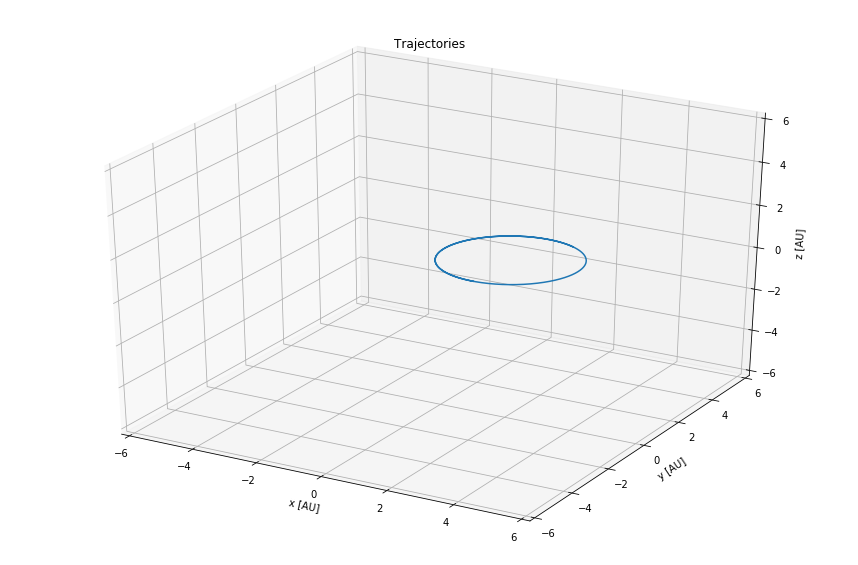

In [20]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_zlim(-6,6)
ax.set_xlabel('x [AU]')
ax.set_ylabel('y [AU]')
ax.set_zlabel('z [AU]')
ax.set_title('Trajectories')

energy = 2e18 # [electronVolts]

direction = 0*cartesian_up + 100 * cartesian_toSun
direction = direction / np.sqrt(np.dot(direction, direction))

import time
start = time.time()
#positions = solveTrajectory(cartesian_Earth, direction, Z_uranium, energy, test_field=np.array([0,0,239.7e-6]))
positions = solveTrajectory([0,0,0], [-1,0,0], Z_uranium, energy, test_field=np.array([0,0,239.7732e-8]))
end = time.time()
print 'elapsed time: {} s'.format(end-start)
ax.plot(positions[:,0], positions[:,1], positions[:,2])

#positions = solveTrajectory(cartesian_Earth, cartesian_toSun, Z_uranium, energy)
#ax.plot(positions[:,0], positions[:,1], positions[:,2])

#positions = solveTrajectory(cartesian_Earth, cartesian_toSun, Z_neutron, energy)
#ax.plot(positions[:,0], positions[:,1], positions[:,2])

#positions = solveTrajectory(cartesian_Earth, cartesian_right, Z_uranium, energy)
#ax.plot(positions[:,0], positions[:,1], positions[:,2])

#positions = solveTrajectory(cartesian_Earth, cartesian_left, Z_uranium, energy)
#ax.plot(positions[:,0], positions[:,1], positions[:,2])

#positions = solveTrajectory(cartesian_Earth, cartesian_up, Z_uranium, energy)
#ax.plot(positions[:,0], positions[:,1], positions[:,2])

#positions = solveTrajectory(cartesian_Earth, cartesian_down, Z_uranium, energy)
#ax.plot(positions[:,0], positions[:,1], positions[:,2])


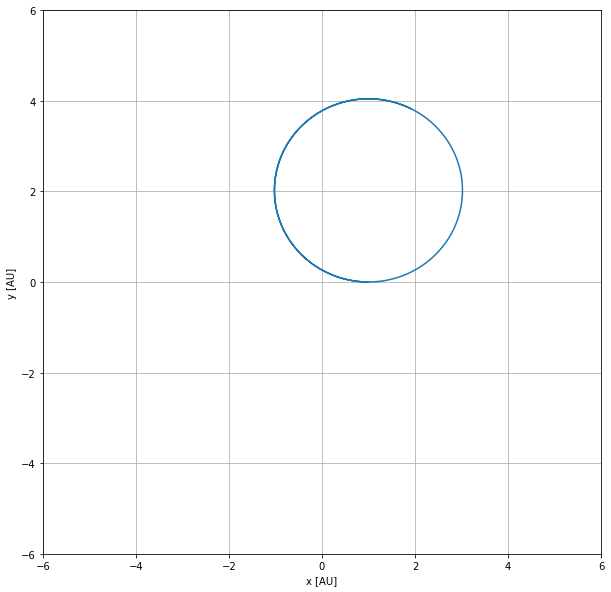

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()#projection='3d')
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
#ax.set_zlim(-6,6)
ax.set_xlabel('x [AU]')
ax.set_ylabel('y [AU]')
ax.grid()
#ax.set_zlabel('z [AU]')
#ax.set_title('Trajectories')

ax.plot(positions[:,0], positions[:,1])

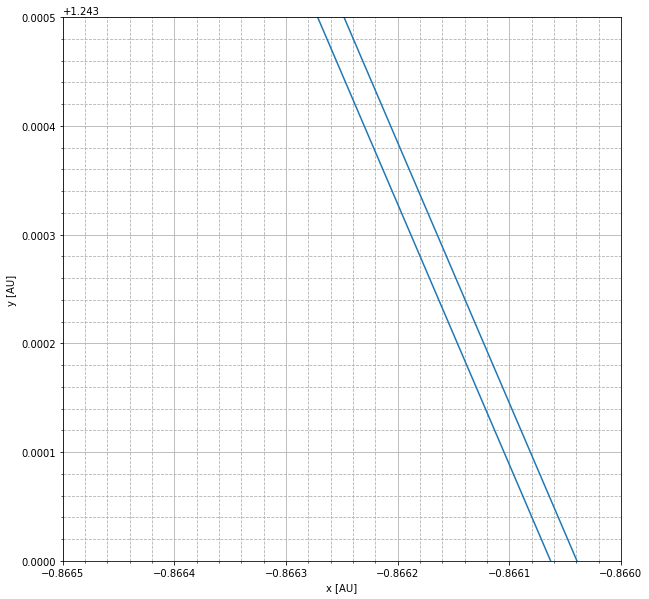

In [32]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()#projection='3d')
ax.set_xlim(-.8665,-.8660)
ax.set_ylim(1.2430,1.2435)
#ax.set_zlim(-6,6)
ax.set_xlabel('x [AU]')
ax.set_ylabel('y [AU]')
ax.minorticks_on()
ax.grid()
ax.grid(which='minor', linestyle='--')
#ax.set_zlabel('z [AU]')
#ax.set_title('Trajectories')

ax.plot(positions[:,0], positions[:,1])

In [119]:
print 'last x,y,z = {}, {}, {}'.format( positions[:,0][-1], positions[:,1][-1], positions[:,2][-1] )

last x,y,z = 1.00966927161, 4.89837931366, -0.0671355927024


In [97]:
# runge-kutta
# takes forever... many minutes
print 'last x,y,z = {}, {}, {}'.format( positions[:,0][-1], positions[:,1][-1], positions[:,2][-1] )

last x,y,z = 7.00001864198, -4.77592112478e-06, 3.03033539362e-19


In [100]:
# vode (53 sec)
print 'last x,y,z = {}, {}, {}'.format( positions[:,0][-1], positions[:,1][-1], positions[:,2][-1] )

last x,y,z = 7.00000000048, -4.77600386297e-06, 3.0315972823e-19


In [103]:
# lsoda (60 sec)
print 'last x,y,z = {}, {}, {}'.format( positions[:,0][-1], positions[:,1][-1], positions[:,2][-1] )

last x,y,z = 7.00000000048, -4.77596489265e-06, 3.01302342343e-19
